## Ejercicio attrition

1. Carga el dataset [attrition de `kaggle`](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download) (Hay que loguearse en kaggle y descargar el csv)
   1. Clasificacion de si el empleado deja o no la empresa (el target es la columna Attrition).
   2. Usaremos TODAS las columnas disponibles del dataset. No hace falta volverse loco con el feature engineering, pero es posible que alguna cosa haya que hacer para poder meter todas las columnas. 
   
2. Prueba todos los métodos de clasificación vistos hasta ahora mediante GridSearchCV (logistic regression, SVM, al menos un metodo de boosting, random forest y MLP). Obligatorio usarlos todos por separado usando pipelines. Se puede hacer todo en sklearn.
   1. Hay que reportar la performance de los modelos con al menos: Accuracy, precission, recall, F1-Score y AUC-ROC
   2. IMPORTANTE: Comentar cual es el mejor metodo y cual es la mejor metrica para este caso de uso concreto.
   
3. Utiliza uno de los métodos para sacar la importancia de las variables del modelo escogido.
   **¿Qué es?**
   Serie de técnicas que asignan puntuaciones a las variables independientes de un modelo predictivo en función de su importancia relativa al realizar una predicción sobre la variable dependiente o target. 
   IMPORTANTE: Antes de obtener el feature importance siempre hay que evaluar la capacidad predictiva del modelo implementado.
   **Tipos**
   1. Métodos "built in" en modelos intrinsecamente intepretables (ya vistos al estudiar los modelos lineales y los modelos basados en árboles de decision). 
   2. Permutation importance
   3. Drop columns importance
   
4. Utilizar un ultimo metodo que sea un stacking (ensemble) de al menos 4 de los metodos anteriores. Obtener las metricas anteriores (acc, prec, recall, etc..)
   
5. Valoracion y comentarios de los resultados obtenidos al final. 

### #1 Carga de datos

In [2]:
import pandas as pd

In [40]:
data = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
data.head(5).transpose()

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor

<Axes: xlabel='Attrition', ylabel='Count'>

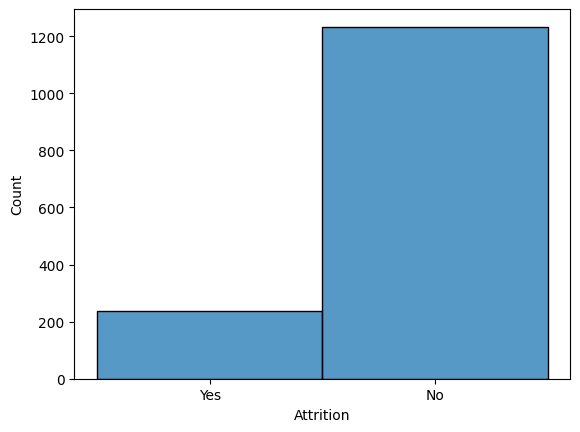

In [44]:
sns.histplot(data["Attrition"], )

### #2 Modelado para clasificación

Siguiendo el esquema:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  <- PARTIMOS DE AQUI
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco. 

In [52]:
dt = data.copy()

In [45]:
df = data.drop(columns="Attrition")
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [46]:
target = data["Attrition"]


In [53]:
# Convertir la columna 'department' en variables dummy

dt['Department'] = dt["Department"].astype("category").cat.codes.astype('int64')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [57]:
dt["BusinessTravel"] = dt["BusinessTravel"].astype("category").cat.codes.astype('int64')
dt["EducationField"] = dt["EducationField"].astype("category").cat.codes.astype('int64')
dt["Gender"] = dt["Gender"].astype("category").cat.codes.astype('int64')
dt["JobRole"] = dt["JobRole"].astype("category").cat.codes.astype('int64')
dt["MaritalStatus"] = dt["MaritalStatus"].astype("category").cat.codes.astype('int64')
dt["OverTime"] = dt["OverTime"].astype("category").cat.codes.astype('int64')
dt["Over18"] = dt["Over18"].astype("category").cat.codes.astype('int64')
dt["Attrition"] = dt["Attrition"].astype("category").cat.codes.astype('int64')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

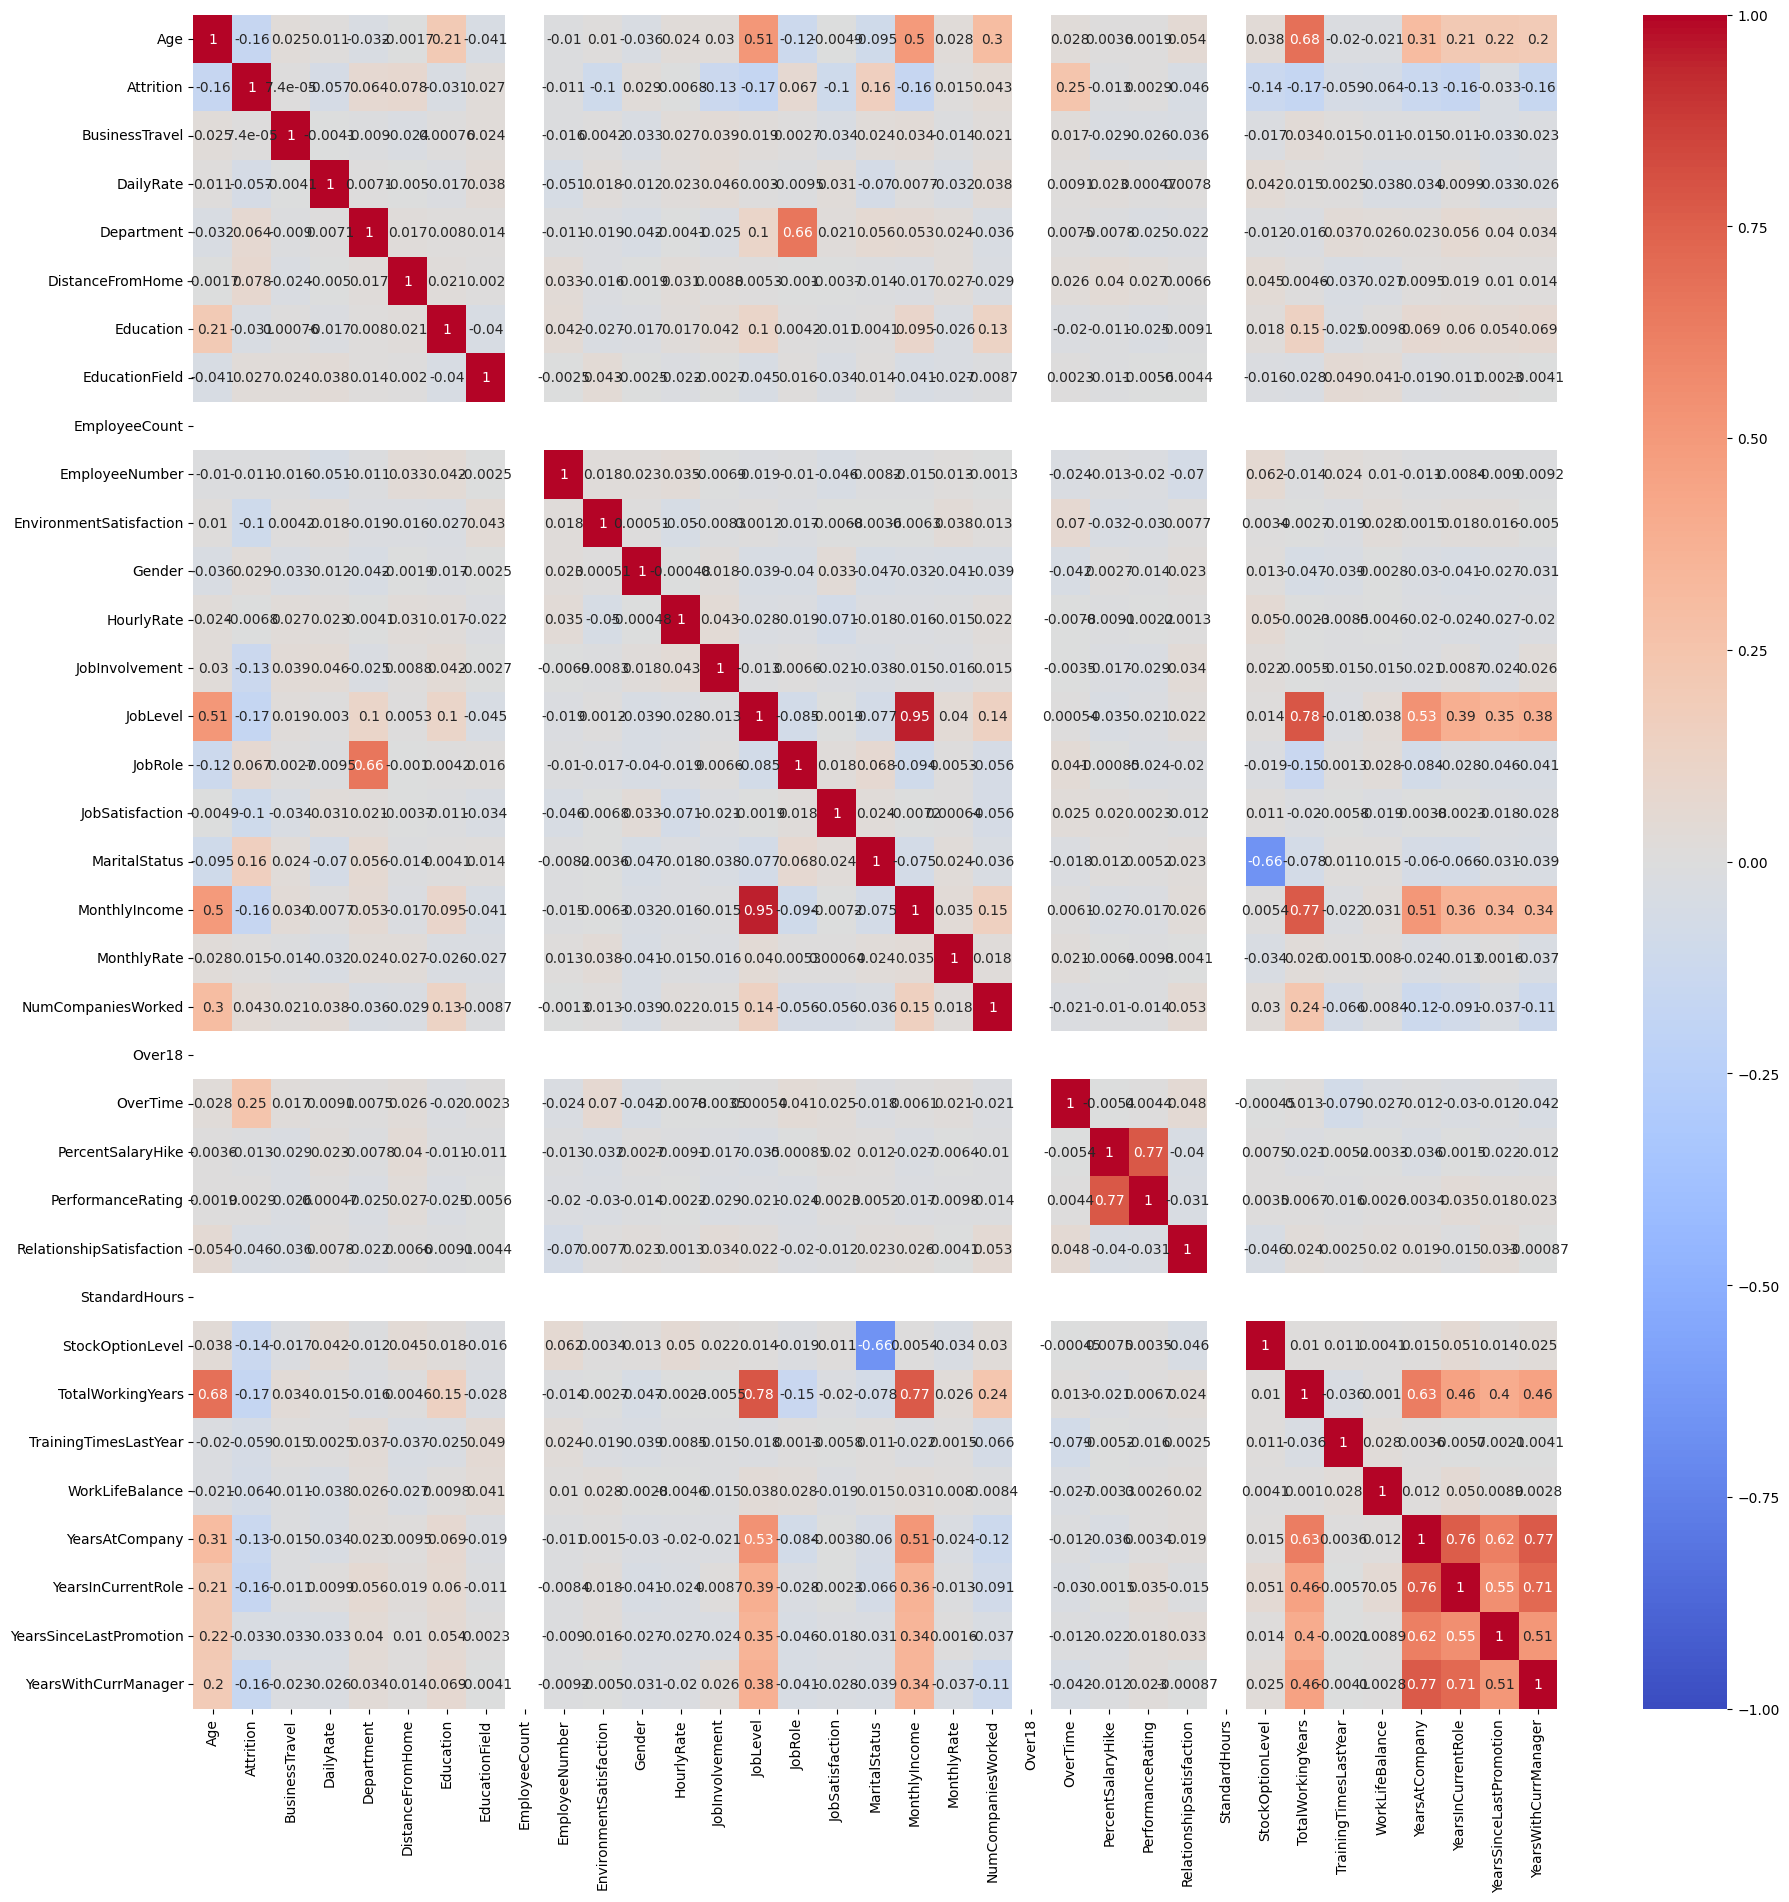

In [60]:
plt.figure(figsize=(22, 22))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

In [61]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [62]:
print(train_set.shape)
print(test_set.shape)


(1176, 34)
(294, 34)
